# Coursework
## Programming in Python for Business Analytics
#### Group 19

#### Data Preparation

The Acme Corporation must complete a task every day; these can be e.g. deliveries of goods, project management tasks, or recruitment of staff. **For completing each task, Acme must choose one out of sixty-four (64) suppliers** that provide the resources required to complete the task. The final cost of the task depends on how effective the chosen supplier is at performing the particular task. Unfortunately, estimating this cost in advance requires significant resources. Acme has hired your Business Analytics firm to develop a machine learning (ML) approach for **selecting suppliers given a new task**.

In [48]:
# Libraries:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import copy
import random

In [77]:
# Import datasets
# Change route for each of us:
tasks = pd.read_csv('tasks.csv')
suppliers = pd.read_csv('suppliers.csv')
cost = pd.read_csv('cost.csv')

### 1. General exploration of data

In [80]:
# Tasks dataset:
tasks.head()

,Task ID,TF1,TF2,TF3,TF4,TF5,TF6,TF7,TF8,TF9,...,TF107,TF108,TF109,TF110,TF111,TF112,TF113,TF114,TF115,TF116
0,T1,332,5123,647174452,2111,41.2063244192855%,140069227,22%,1438,0.280695,...,50,0,93828.91,759621.99,12264068,0,382,0.074566,28150864,0.04
1,T2,0,5792,327432022,1619,27.9523480662983%,105875589,32%,1097,0.189399,...,875,0,924983.41,3294170.58,29172807,0,552,0.095304,28894396,0.09
2,T3,469,4346,547810586,1376,31.6612977450529%,90478530,17%,1097,0.252416,...,394,0,258487.96,1781016.69,39064840,0,706,0.162448,19579305,0.04
3,T4,529,7132,700169181,2362,33.1183398766124%,149526281,21%,1474,0.206674,...,997,0,640011.29,2434120.90,29710103,0,371,0.052019,22272333,0.03
4,T5,0,4767,278792402,1215,25.4877281308999%,87557248,31%,1038,0.217747,...,567,0,625549.93,2506860.98,22039095,0,93,0.019509,3058291,0.01


In [82]:
tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Columns: 117 entries, Task ID to TF116
dtypes: float64(56), int64(58), object(3)
memory usage: 119.0+ KB


In [84]:
# Suppliers dataset:
suppliers.head()

,Features,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S55,S56,S57,S58,S59,S60,S61,S62,S63,S64
0,SF1,100,100,100,100,10,10,100,100,1000,...,10,10,100,1000,10,10,100,1000,100,100
1,SF2,1000,1000,1000,1000,1000,100,2000,1000,2000,...,2000,100,2000,2000,2000,100,2000,1000,1000,2000
2,SF3,1000,1000,1000,1000,100,2000,1000,100,100,...,1000,2000,2000,2000,100,100,1000,2000,1000,1000
3,SF4,50,50,50,50,500,5,5,50,500,...,50,50,50,5,50,5,5,5,50,500
4,SF5,20,20,20,20,200,200,20,2,20,...,20,20,20,200,20,200,2,200,200,2


In [86]:
# Costs dataset:
cost.head()

,Task ID,Supplier ID,Cost
0,T34,S1,0.478219
1,T34,S2,0.444543
2,T34,S3,0.521679
3,T34,S4,0.307331
4,T34,S5,0.357689


In [88]:
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7680 entries, 0 to 7679
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Task ID      7680 non-null   object 
 1   Supplier ID  7680 non-null   object 
 2   Cost         7680 non-null   float64
dtypes: float64(1), object(2)
memory usage: 180.1+ KB


In [90]:
cost.groupby('Supplier ID').describe()

Cost                                                    \
             count      mean       std       min       25%       50%   
Supplier ID                                                            
S1           120.0  0.443069  0.056911  0.322824  0.409920  0.445100   
S10          120.0  0.403872  0.058571  0.307112  0.355072  0.409107   
S11          120.0  0.401271  0.052396  0.307484  0.355307  0.405965   
S12          120.0  0.415246  0.055589  0.302905  0.372291  0.421329   
S13          120.0  0.407144  0.055184  0.305388  0.360740  0.414593   
...            ...       ...       ...       ...       ...       ...   
S63          120.0  0.418999  0.054589  0.309390  0.375066  0.420294   
S64          120.0  0.405255  0.052571  0.307449  0.364090  0.406298   
S7           120.0  0.413232  0.054336  0.302261  0.375506  0.419115   
S8           120.0  0.418884  0.051507  0.299798  0.381543  0.414817   
S9           120.0  0.414777  0.050464  0.301240  0.386813  0.414180   

                                 
                  75%       max  
Supplier ID                      
S1           0.473163  0.694525  
S10          0.441094  0.645559  
S11          0.441124  0.621962  
S12          0.451475  0.651132  
S13          0.444870  0.657804  
...               ...       ...  
S63          0.456661  0.689491  
S64          0.441301  0.559792  
S7           0.445572  0.666881  
S8           0.447079  0.657675  
S9           0.439706  0.663978  

[64 rows x 8 columns]

In [91]:
# Missing values
print('Missing values in suppliers dataset:', suppliers.isnull().sum().sum())
print('Missing values in cost dataset:', cost.isnull().sum().sum())
print('Missing values in tasks dataset:', tasks.isnull().sum().sum())

Missing values in suppliers dataset: 0
Missing values in cost dataset: 0
Missing values in tasks dataset: 0


In [94]:
# Tasks (unrelated to cost)
print("No of Task ID in Tasks:",tasks['Task ID'].nunique())
print("No of Task ID in cost:",cost['Task ID'].nunique())

No of Task ID in Tasks: 130
No of Task ID in cost: 120


In [96]:
cost_match = cost['Task ID'].unique()
tasks=tasks.loc[tasks['Task ID'].isin(cost_match)]
tasks['Task ID'].nunique()

120

In [98]:
print("'tasks' dataset info:\n{} tasks\n{} task features".format(len(tasks),len(tasks.columns[1:])))
#suppliers
print("\n'suppliers' dataset info:\n{} suppliers\n{} supplier features".format(len(suppliers),len(suppliers.columns[1:])))
#costs
print("\n'cost' dataset info:\n{} tasks\n{} suppliers\n{} cost values".format(len(cost.loc[:,'Task ID'].unique()), \
    len(cost.loc[:,'Supplier ID'].unique()), len(cost.loc[:, 'Cost'])))

'tasks' dataset info:
120 tasks
116 task features

'suppliers' dataset info:
18 suppliers
64 supplier features

'cost' dataset info:
120 tasks
64 suppliers
7680 cost values


### 2. Data transformation

In [101]:
# Fixing the structure of the suppliers df
suppliers = suppliers.transpose()
suppliers.columns = suppliers.iloc[0]
suppliers = suppliers.drop('Features', axis='index')
suppliers = suppliers.reset_index()

In [103]:
suppliers.head()

Features,index,SF1,SF2,SF3,SF4,SF5,SF6,SF7,SF8,SF9,SF10,SF11,SF12,SF13,SF14,SF15,SF16,SF17,SF18
0,S1,100,1000,1000,50,20,10,2,80,2000,100,1000,5,1000,1000,500,5000,100,96
1,S2,100,1000,1000,50,20,10,0,80,2000,100,1000,5,1000,1000,500,5000,100,96
2,S3,100,1000,1000,50,20,10,2,80,2000,100,1000,5,1000,1000,500,5000,0,96
3,S4,100,1000,1000,50,20,10,2,80,2000,100,1000,5,1000,1000,500,5000,5000,96
4,S5,10,1000,100,500,200,10,2,80,200,100,2000,8,2000,100,2000,5000,15000,90


In [105]:
# Fixing the non-numeric columns in Tasks
tasks = tasks.set_index('Task ID')
for col in tasks.columns:
    if tasks[col].dtype == 'object':  # Check if column is of object type (often strings)
        try:
            # Attempt to convert to numeric, handling errors
            tasks[col] = pd.to_numeric(tasks[col].str.rstrip('%'), errors='coerce') /100
        except AttributeError:
            pass # Skip if not a string or does not contain '%'
tasks = tasks.reset_index()

In [107]:
tasks.head()

,Task ID,TF1,TF2,TF3,TF4,TF5,TF6,TF7,TF8,TF9,...,TF107,TF108,TF109,TF110,TF111,TF112,TF113,TF114,TF115,TF116
0,T1,332,5123,647174452,2111,0.412063,140069227,0.22,1438,0.280695,...,50,0,93828.91,759621.99,12264068,0,382,0.074566,28150864,0.04
1,T2,0,5792,327432022,1619,0.279523,105875589,0.32,1097,0.189399,...,875,0,924983.41,3294170.58,29172807,0,552,0.095304,28894396,0.09
2,T3,469,4346,547810586,1376,0.316613,90478530,0.17,1097,0.252416,...,394,0,258487.96,1781016.69,39064840,0,706,0.162448,19579305,0.04
3,T4,529,7132,700169181,2362,0.331183,149526281,0.21,1474,0.206674,...,997,0,640011.29,2434120.90,29710103,0,371,0.052019,22272333,0.03
4,T5,0,4767,278792402,1215,0.254877,87557248,0.31,1038,0.217747,...,567,0,625549.93,2506860.98,22039095,0,93,0.019509,3058291,0.01


### 3. Feature selection

In [110]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
# Combine datasets for quick analysis (without costs for now)
combined = tasks.merge(suppliers, how='cross')
combined = combined.merge(cost, left_on=['Task ID', 'index'], right_on=['Task ID','Supplier ID'])
combined_features = combined.drop(['Task ID','index','Supplier ID', 'Cost'],  axis='columns')
combined_y = combined['Cost']

In [112]:
# Each row is a task-specific and supplier-specific combination:
combined_features.head()

,TF1,TF2,TF3,TF4,TF5,TF6,TF7,TF8,TF9,TF10,...,SF9,SF10,SF11,SF12,SF13,SF14,SF15,SF16,SF17,SF18
0,332,5123,647174452,2111,0.412063,140069227,0.22,1438,0.280695,154237601,...,2000,100,1000,5,1000,1000,500,5000,100,96
1,332,5123,647174452,2111,0.412063,140069227,0.22,1438,0.280695,154237601,...,2000,100,1000,5,1000,1000,500,5000,100,96
2,332,5123,647174452,2111,0.412063,140069227,0.22,1438,0.280695,154237601,...,2000,100,1000,5,1000,1000,500,5000,0,96
3,332,5123,647174452,2111,0.412063,140069227,0.22,1438,0.280695,154237601,...,2000,100,1000,5,1000,1000,500,5000,5000,96
4,332,5123,647174452,2111,0.412063,140069227,0.22,1438,0.280695,154237601,...,200,100,2000,8,2000,100,2000,5000,15000,90


In [116]:
# The cost for each combination:
combined_y.head()

0    0.496239
1    0.512522
2    0.514350
3    0.384386
4    0.427075
Name: Cost, dtype: float64

In [117]:
# Fit a Random Forest for feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(combined_features, combined_y)

RandomForestRegressor(random_state=42)

In [119]:
# Get feature importances
importances = rf.feature_importances_
feature_names = combined_features.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

In [120]:
importance_df.head(10)

,Feature,Importance
70,TF71,0.373325
2,TF3,0.077641
132,SF17,0.062659
23,TF24,0.055294
125,SF10,0.028121
86,TF87,0.027197
94,TF95,0.018297
57,TF58,0.016972
122,SF7,0.014965
40,TF41,0.014945


In [121]:
importance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 70 to 99
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature     134 non-null    object 
 1   Importance  134 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


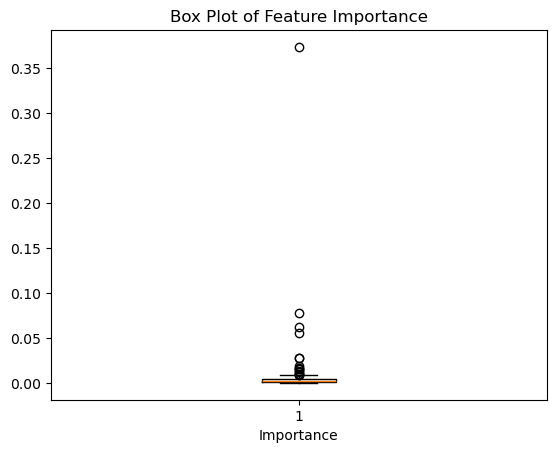

In [122]:
plt.boxplot(importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Box Plot of Feature Importance')
plt.show()

In [123]:
importance_df['Importance'].describe()    

count    134.000000
mean       0.007463
std        0.033485
min        0.000000
25%        0.000889
50%        0.001707
75%        0.004097
max        0.373325
Name: Importance, dtype: float64

In [124]:
# Remove under 25% of Importance
importance_threshold = importance_df['Importance'].quantile(q=0.25)
importance_df = importance_df[importance_df['Importance'] >= importance_threshold]

In [125]:
# Check the feature list
feature_list = importance_df['Feature'].unique()
feature_list

array(['TF71', 'TF3', 'SF17', 'TF24', 'SF10', 'TF87', 'TF95', 'TF58',
       'SF7', 'TF41', 'TF64', 'TF86', 'TF52', 'SF18', 'TF66', 'TF32',
       'TF5', 'TF94', 'TF13', 'TF25', 'TF7', 'SF1', 'SF3', 'TF43', 'TF26',
       'SF9', 'TF33', 'TF51', 'SF6', 'SF8', 'SF14', 'SF11', 'SF16', 'SF5',
       'TF63', 'SF2', 'TF50', 'SF4', 'SF15', 'SF12', 'SF13', 'TF73',
       'TF107', 'TF80', 'TF111', 'TF57', 'TF16', 'TF17', 'TF82', 'TF59',
       'TF109', 'TF9', 'TF21', 'TF23', 'TF91', 'TF37', 'TF47', 'TF114',
       'TF115', 'TF68', 'TF27', 'TF60', 'TF90', 'TF54', 'TF67', 'TF116',
       'TF38', 'TF18', 'TF85', 'TF70', 'TF11', 'TF48', 'TF14', 'TF93',
       'TF45', 'TF106', 'TF65', 'TF113', 'TF61', 'TF105', 'TF10', 'TF74',
       'TF101', 'TF49', 'TF53', 'TF22', 'TF56', 'TF110', 'TF77', 'TF81',
       'TF42', 'TF103', 'TF55', 'TF102', 'TF62', 'TF29', 'TF44', 'TF83',
       'TF40', 'TF36'], dtype=object)

In [126]:
# Feature Seperate
features_T = [feature for feature in feature_list if feature.startswith('T')]
features_S = [feature for feature in feature_list if feature.startswith('S')]

In [127]:
# Reinstate indicies
tasks = tasks.set_index('Task ID')
suppliers = suppliers.set_index('index')
suppliers.index.rename('Supplier ID', inplace=True)

In [128]:
# Select the features ahead of scaling
suppliers_selected = suppliers[features_S]
tasks_selected = tasks[features_T]

In [129]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

In [130]:
scaler = MinMaxScaler()
tasks_selected[:] = scaler.fit_transform(tasks_selected)
suppliers_selected[:] = scaler.fit_transform(suppliers_selected)

C:\Users\bdaus\AppData\Local\Temp\ipykernel_424\3546469203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tasks_selected[:] = scaler.fit_transform(tasks_selected)
C:\Users\bdaus\AppData\Local\Temp\ipykernel_424\3546469203.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.51937984 0.76744186 0.0620155  0.51937984 0.79844961 0.87596899
 0.05426357 0.05426357 0.05426357 0.86046512 0.05426357 0.01550388
 0.04651163 0.04651163 0.04651163 0.04651163 0.00775194 0.00775194
 0.8372093  0.03875969 0.68992248 0.03875969 0.         0.88372093
 0.7751938  0.8372093  0.26356589 0.17054264 0.10077519 0.10852713
 0.10852713 0.10077519 0.10077519 0.10077519 0.09302326 0.08527132
 0.

In [131]:
tasks_selected.head()

,TF71,TF3,TF24,TF87,TF95,TF58,TF41,TF64,TF86,TF52,...,TF42,TF103,TF55,TF102,TF62,TF29,TF44,TF83,TF40,TF36
Task ID,,,,,,,,,,,,,,,,,,,,,
T1,0.519380,0.824272,0.922770,0.358938,0.245745,0.880942,0.873304,0.592593,0.211647,0.201602,...,0.810811,0.501986,0.425532,0.340138,0.924201,0.341286,0.669821,0.240036,0.623443,0.864608
T2,0.767442,0.366460,0.383526,0.214764,0.270516,0.395101,0.369500,0.703704,0.127506,0.743036,...,0.189189,0.271958,0.361702,0.158341,0.389131,0.591669,0.570978,0.566123,0.458444,0.679335
T3,0.062016,0.682001,0.716395,0.192226,0.204648,0.661250,0.664852,0.555556,0.068460,0.355501,...,0.513514,0.271893,0.553191,0.116285,0.695007,0.252064,0.498423,0.209239,0.403104,0.532067
T4,0.519380,0.900150,1.000000,0.345486,0.212572,0.871388,0.864197,0.592593,0.186139,0.927228,...,0.189189,0.484898,0.574468,0.282028,0.920153,0.725871,0.688749,0.759058,0.607719,0.869359
T5,0.798450,0.296817,0.256127,0.114602,0.157559,0.322778,0.307126,0.703704,0.039803,0.559889,...,0.270270,0.155785,0.340426,0.061282,0.320988,0.349948,0.503680,0.283514,0.366755,0.560570


In [132]:
suppliers_selected.head()

Features,SF17,SF10,SF7,SF18,SF1,SF3,SF9,SF6,SF8,SF14,SF11,SF16,SF5,SF2,SF4,SF15,SF12,SF13
Supplier ID,,,,,,,,,,,,,,,,,,
S1,0.002,0.183673,0.666667,0.75,0.090909,0.473684,0.473684,0.090909,0.146341,0.473684,0.473684,0.6,0.090909,0.473684,0.090909,0.230769,0.571429,0.473684
S2,0.002,0.183673,0.0,0.75,0.090909,0.473684,0.473684,0.090909,0.146341,0.473684,0.473684,0.6,0.090909,0.473684,0.090909,0.230769,0.571429,0.473684
S3,0.0,0.183673,0.666667,0.75,0.090909,0.473684,0.473684,0.090909,0.146341,0.473684,0.473684,0.6,0.090909,0.473684,0.090909,0.230769,0.571429,0.473684
S4,0.1,0.183673,0.666667,0.75,0.090909,0.473684,0.473684,0.090909,0.146341,0.473684,0.473684,0.6,0.090909,0.473684,0.090909,0.230769,0.571429,0.473684
S5,0.3,0.183673,0.666667,0.0,0.0,0.0,0.0,0.090909,0.146341,0.0,1.0,0.6,1.0,0.473684,1.0,1.0,1.0,1.0


### 4. Best performing suppliers

In [134]:
# Top-performing
avg_cost = cost.groupby('Supplier ID')['Cost'].mean()
avg_cost.sort_values()
avg_cost.head(n=5)

Supplier ID
S1     0.443069
S10    0.403872
S11    0.401271
S12    0.415246
S13    0.407144
Name: Cost, dtype: float64

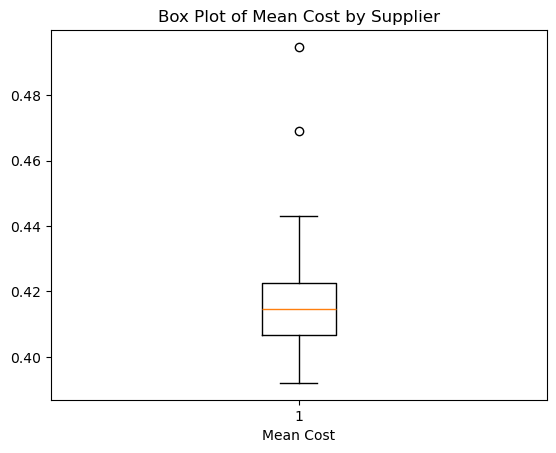

In [135]:
plt.boxplot(avg_cost)
plt.xlabel('Mean Cost')
plt.title('Box Plot of Mean Cost by Supplier')
plt.show()

In [136]:
# Worst-performing ((modifiable) Standard : 10%)
cost_threshold = avg_cost.quantile(q=0.95)
chosen_suppliers = avg_cost[avg_cost.values < cost_threshold]
suppliers_scaled_trimmed = suppliers_selected[suppliers.index.isin(chosen_suppliers.index)]

In [137]:
# Using this threshold, 4 suppliers were trimmed from the dataset
print('Suppliers removed:', len(suppliers)-len(suppliers_scaled_trimmed))

Suppliers removed: 4


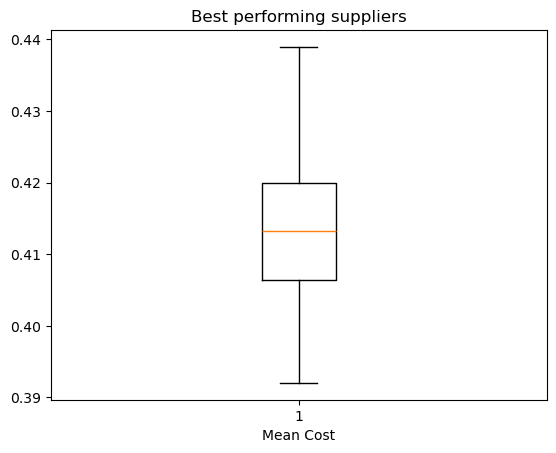

In [138]:
plt.boxplot(chosen_suppliers)
plt.xlabel('Mean Cost')
plt.title('Best performing suppliers')
plt.show()

### 5. Correlation Matrix between predictors

In [140]:
# Whole dataset:
cost_preprocessed = cost[cost['Supplier ID'].isin(chosen_suppliers.index)]
tasks_preprocessed = tasks_selected.reset_index()
suppliers_preprocessed = suppliers_scaled_trimmed.reset_index()

merged = tasks_preprocessed.merge(suppliers_preprocessed, how='cross')
dataset = merged.merge(cost_preprocessed, 
                       left_on=['Task ID','Supplier ID'],
                       right_on=['Task ID','Supplier ID'])

In [141]:
dataset.head()

,Task ID,TF71,TF3,TF24,TF87,TF95,TF58,TF41,TF64,TF86,...,SF14,SF11,SF16,SF5,SF2,SF4,SF15,SF12,SF13,Cost
0,T1,0.51938,0.824272,0.92277,0.358938,0.245745,0.880942,0.873304,0.592593,0.211647,...,0.473684,0.473684,0.6,0.090909,0.473684,0.090909,0.230769,0.571429,0.473684,0.384386
1,T1,0.51938,0.824272,0.92277,0.358938,0.245745,0.880942,0.873304,0.592593,0.211647,...,0.0,1.0,0.6,1.0,0.473684,1.0,1.0,1.0,1.0,0.427075
2,T1,0.51938,0.824272,0.92277,0.358938,0.245745,0.880942,0.873304,0.592593,0.211647,...,1.0,1.0,0.6,1.0,0.0,0.0,0.230769,0.0,0.0,0.386642
3,T1,0.51938,0.824272,0.92277,0.358938,0.245745,0.880942,0.873304,0.592593,0.211647,...,0.0,0.473684,1.0,0.090909,1.0,0.0,1.0,0.571429,1.0,0.392691
4,T1,0.51938,0.824272,0.92277,0.358938,0.245745,0.880942,0.873304,0.592593,0.211647,...,1.0,0.0,1.0,0.0,0.473684,0.090909,0.230769,0.571429,1.0,0.434512


In [142]:
X = dataset.drop(['Task ID','Supplier ID','Cost'], axis='columns')

In [143]:
# All predictors as numeric vectors:
X_numeric = X.apply(pd.to_numeric, errors='coerce')

In [144]:
# Task features (columns starting with 'TF')
task_features = X_numeric.filter(like='TF')

# Supplier features (columns starting with 'SF')
supplier_features = X_numeric.filter(like='SF')

In [145]:
correlation_matrix_tf = task_features.corr()
correlation_matrix_sf = supplier_features.corr()

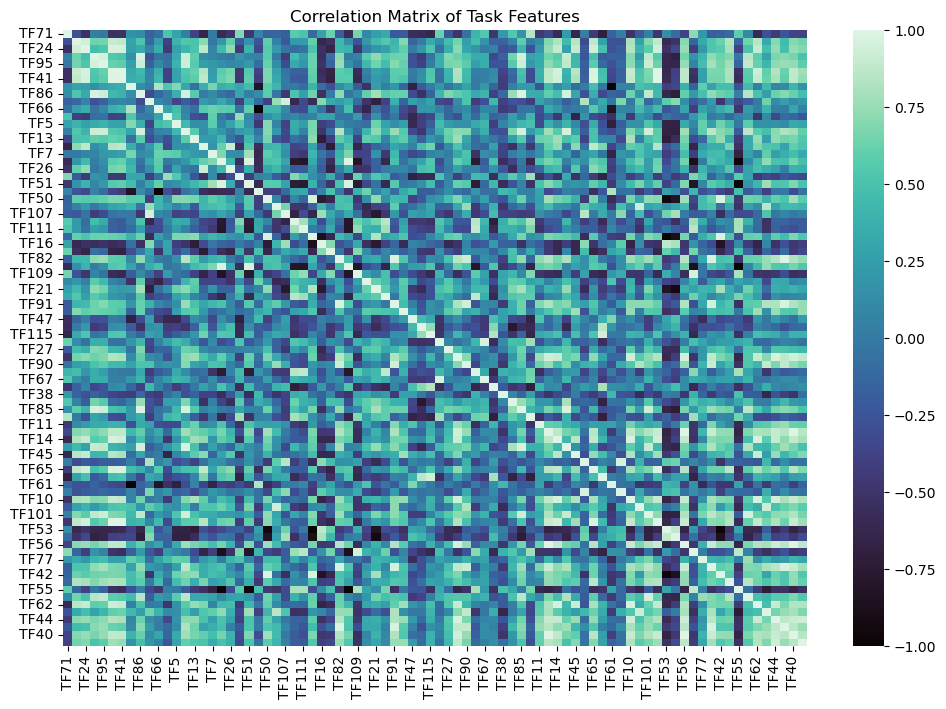

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_tf, cmap='mako', annot=False, fmt=".2f")
plt.title("Correlation Matrix of Task Features")
plt.show()

In [147]:
# We can change this:
upper_threshold = 0.8   
lower_threshold = -0.8  

# Compute the correlation matrix
corr_matrix = correlation_matrix_tf

# Extract the pairs that exceed thresholds
high_corr_pairs = [
    (feature1, feature2, corr_matrix.loc[feature1, feature2])
    for feature1 in corr_matrix.columns
    for feature2 in corr_matrix.columns
    if feature1 != feature2 and (corr_matrix.loc[feature1, feature2] > upper_threshold or corr_matrix.loc[feature1, feature2] < lower_threshold)
]

# Create a DataFrame of high correlation pairs
high_corr_table = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])

# Drop duplicate pairs (since correlation matrix is symmetric)
high_corr_table = high_corr_table.drop_duplicates(subset=['Correlation']).sort_values(by='Correlation', ascending=False)


In [148]:
# These are the high correlated predictors that we should drop:
high_corr_table.head()

,Feature 1,Feature 2,Correlation
355,TF56,TF40,0.999353
228,TF48,TF40,0.998891
222,TF48,TF56,0.998122
37,TF58,TF41,0.996090
61,TF41,TF49,0.995303


In [149]:
high_corr_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237 entries, 355 to 153
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Feature 1    237 non-null    object 
 1   Feature 2    237 non-null    object 
 2   Correlation  237 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.4+ KB


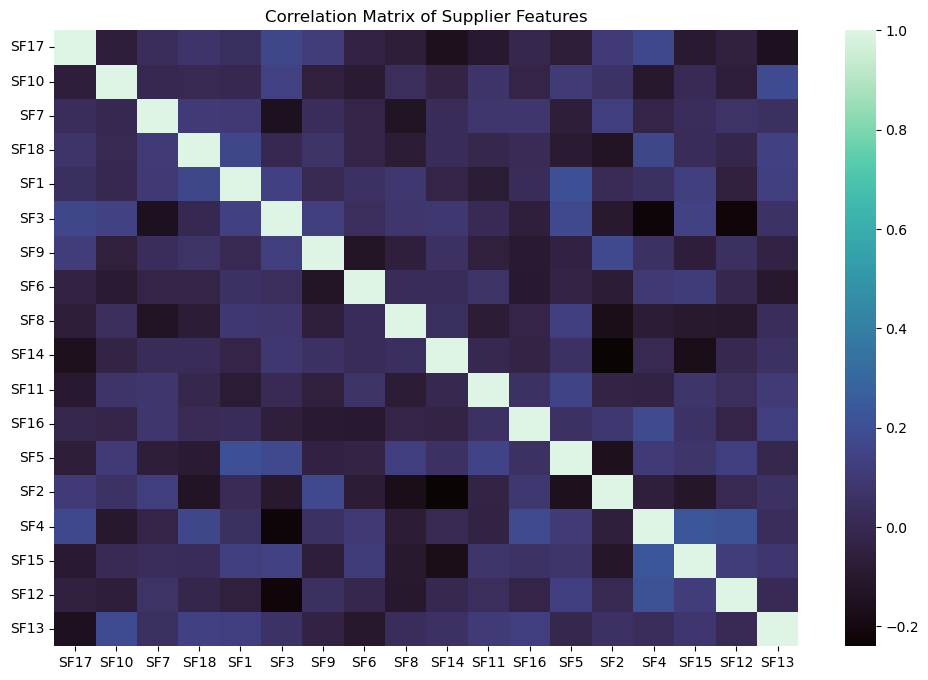

In [162]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_sf, cmap='mako', annot=False, fmt=".2f")
plt.title("Correlation Matrix of Supplier Features")
plt.show()

In [151]:
# Compute the correlation matrix
corr_matrix = correlation_matrix_sf

# Extract the pairs that exceed thresholds
high_corr_pairs = [
    (feature1, feature2, corr_matrix.loc[feature1, feature2])
    for feature1 in corr_matrix.columns
    for feature2 in corr_matrix.columns
    if feature1 != feature2 and (corr_matrix.loc[feature1, feature2] > upper_threshold or corr_matrix.loc[feature1, feature2] < lower_threshold)
]

# Create a DataFrame of high correlation pairs
high_corr_table = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])

# Drop duplicate pairs (since correlation matrix is symmetric)
high_corr_table = high_corr_table.drop_duplicates(subset=['Correlation']).sort_values(by='Correlation', ascending=False)

In [152]:
# No high correlated predictos for Suppliers Features
high_corr_table.head()

,Feature 1,Feature 2,Correlation


In [153]:
#Q2- EDA

In [154]:
#2.1 Use EDA methods to analyse the distribution of task features and interpret emerging patterns

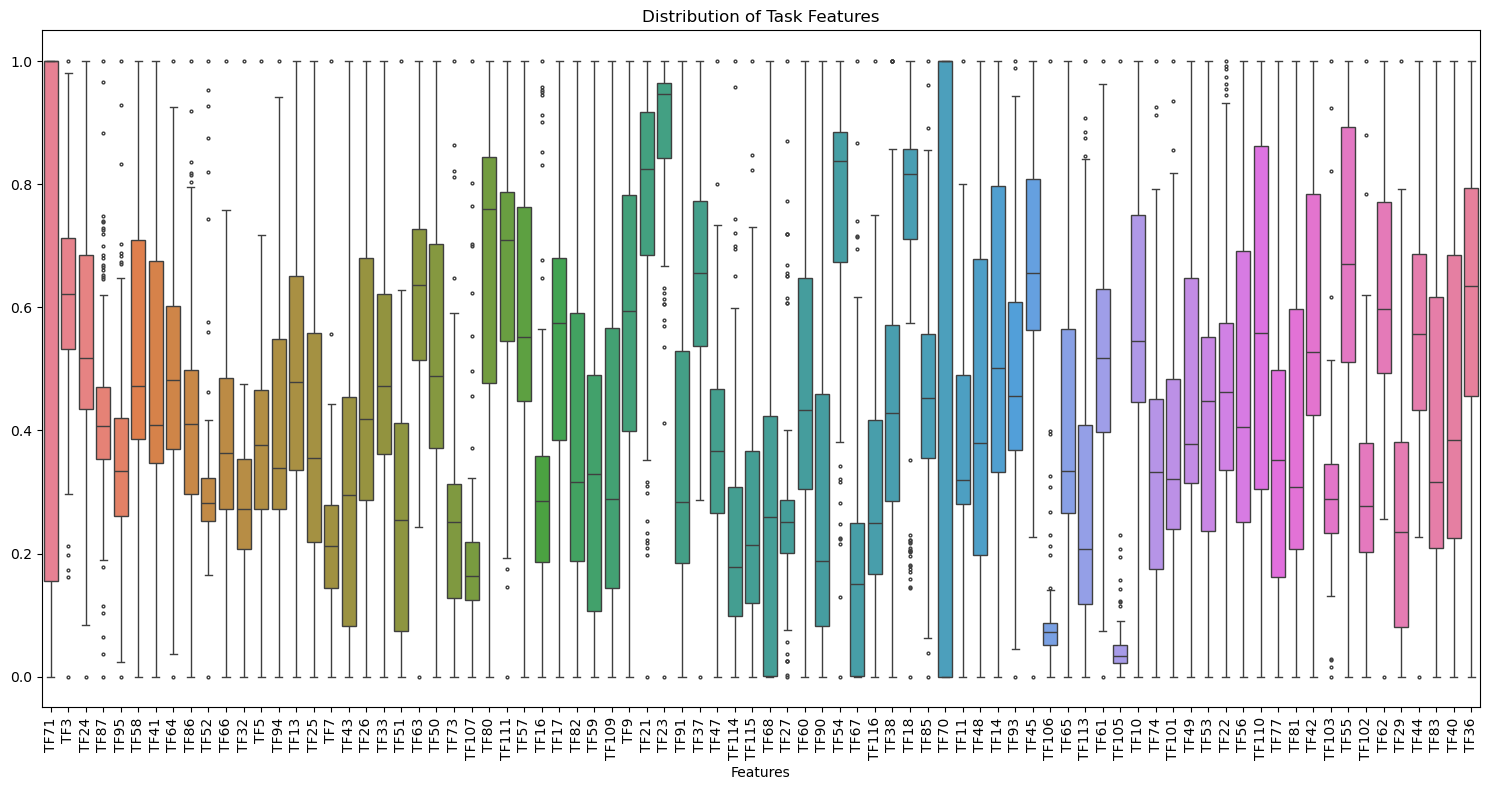

In [157]:
plt.figure(figsize=(15, 8))
flierprops = dict(marker='o', markersize=2)
fig1 = sns.boxplot(data=tasks_selected, flierprops=flierprops)
fig1.set(xlabel='Features')
fig1.axes.set_title('Distribution of Task Features')
fig1.set_xticks(range(len(tasks_selected.columns)))
fig1.set_xticklabels(tasks_selected.columns, rotation=90)
plt.tight_layout()
plt.show()

In [195]:
tasks_std = tasks_selected.std()

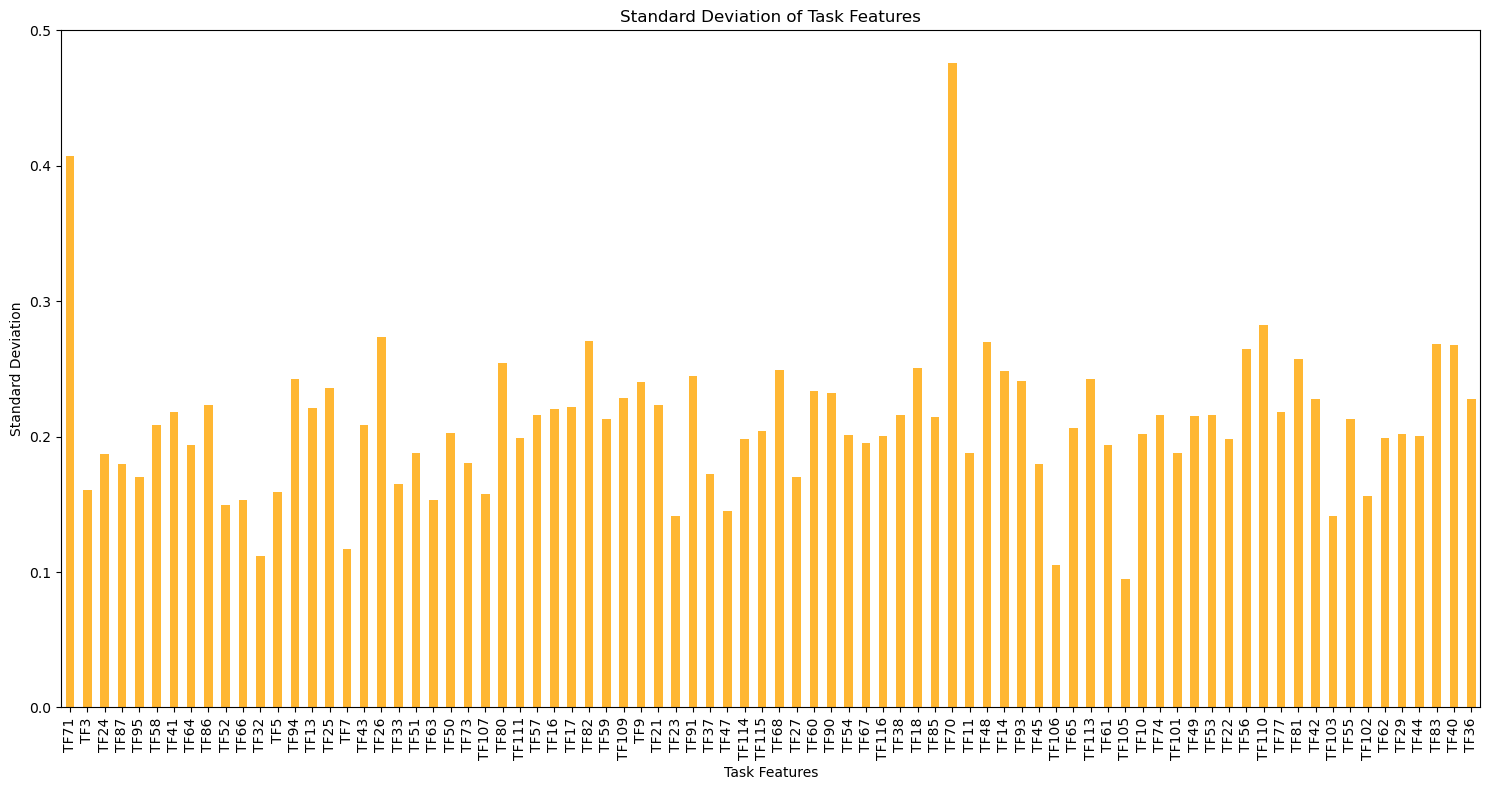

In [197]:
plt.figure(figsize=(15, 8))
tasks_std.plot(kind='bar', color='orange', alpha=0.8)
plt.title("Standard Deviation of Task Features")
plt.xlabel("Task Features")
plt.ylabel("Standard Deviation")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

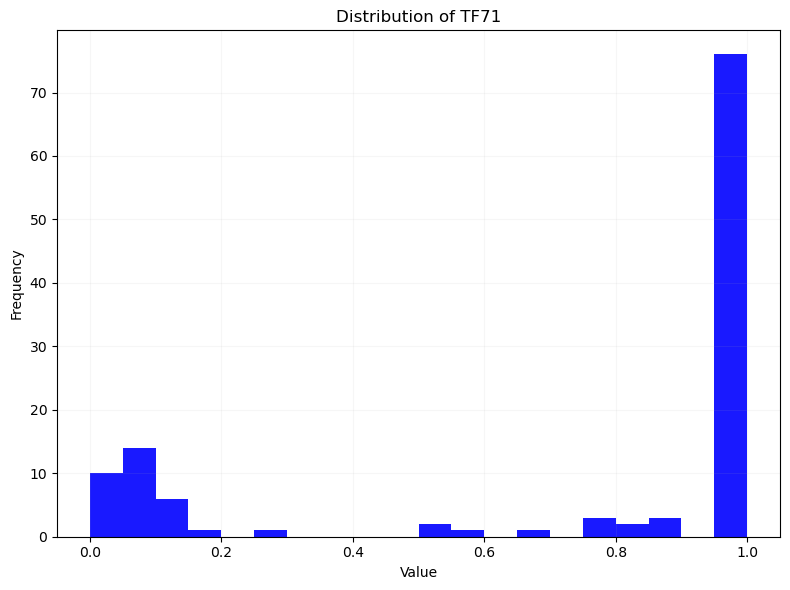

In [199]:
# Histogram for TF71- most important
plt.figure(figsize=(8, 6))
plt.hist(tasks_selected['TF71'], bins=20, color='blue', alpha=0.9)
plt.title("Distribution of TF71")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(alpha=0.1)
plt.tight_layout()
plt.show()

In [ ]:
# Histogram for TF70
plt.figure(figsize=(8, 6))
plt.hist(tasks_selected['TF70'], bins=20, color='blue', alpha=0.9)
plt.title("Distribution of TF70")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(alpha=0.1)
plt.tight_layout()
plt.show()
#Not sure whether or not to include these histograms

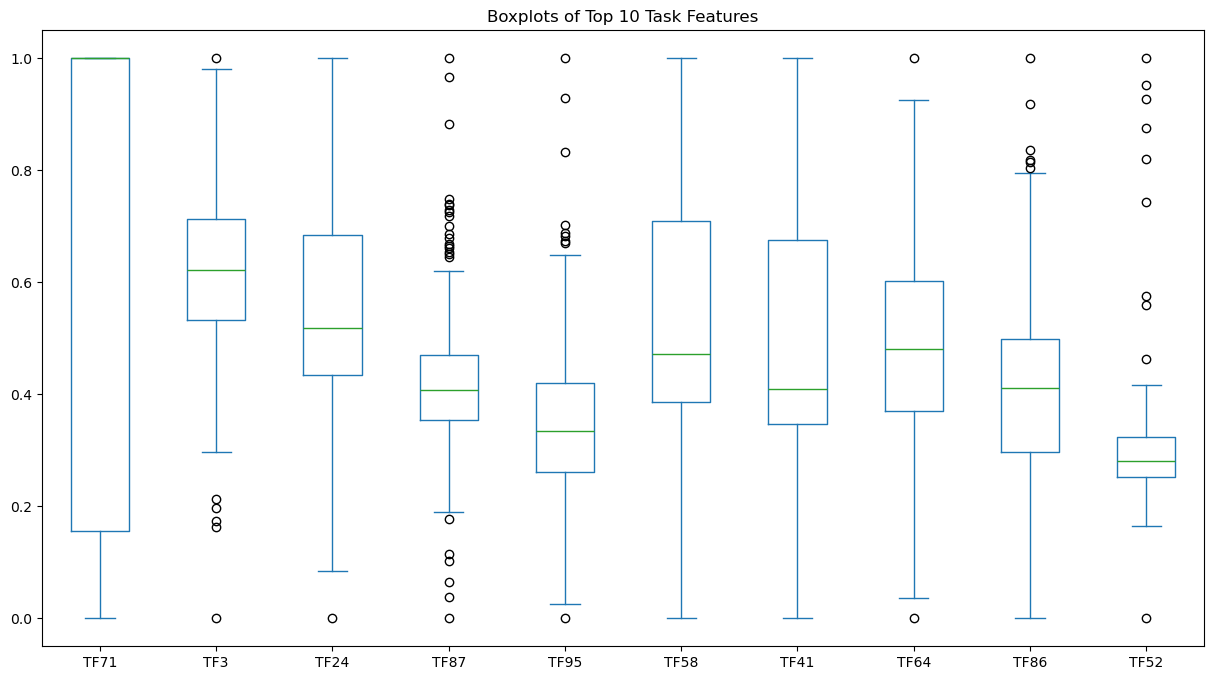

In [201]:
top_10_features = importance_df[importance_df['Feature'].str.startswith('T')].head(10)['Feature']
tasks_selected[top_10_features].plot(kind='box', figsize=(15, 8))
plt.title("Boxplots of Top 10 Task Features")
plt.show() 
#the top 10 all have a large IQR or significant outliers

In [ ]:
#Q2.2- Analyse the cost data to identify patterns and good combinations of tasks and suppliers

     Task ID Supplier ID      Cost
1169      T1         S18  0.355652
439      T10         S56  0.317026
5752    T100         S57  0.411130
5795    T101         S36  0.408853
5879    T102         S56  0.389170


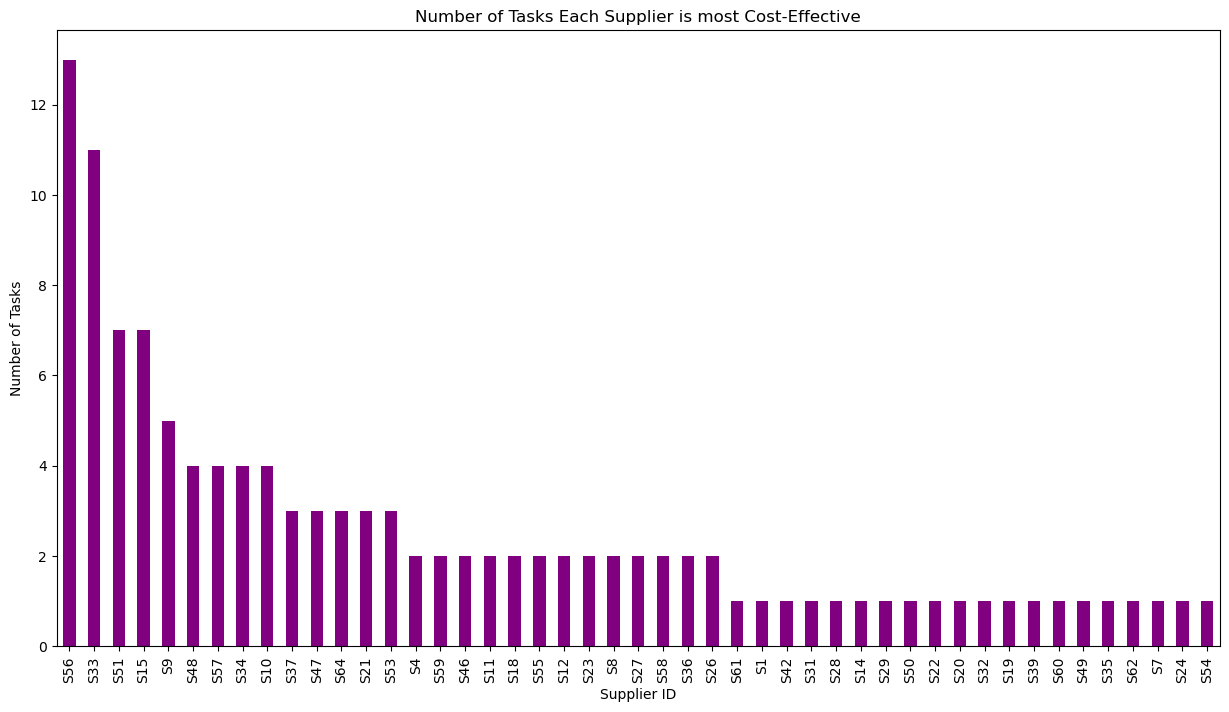

In [203]:
# Find the most cost effective supplier for each task
Best_Suppliers = cost.loc[cost.groupby('Task ID')['Cost'].idxmin()]
print(Best_Suppliers.head())
Best_Supplier_Counts = Best_Suppliers['Supplier ID'].value_counts()
Best_Supplier_Counts.plot(kind='bar', figsize=(15, 8), color='purple')
plt.title("Number of Tasks Each Supplier is most Cost-Effective")
plt.xlabel("Supplier ID")
plt.ylabel("Number of Tasks")
plt.show() #how many times each supplier is the most cost effective for all tasks
#S56, S33 are the two most popular

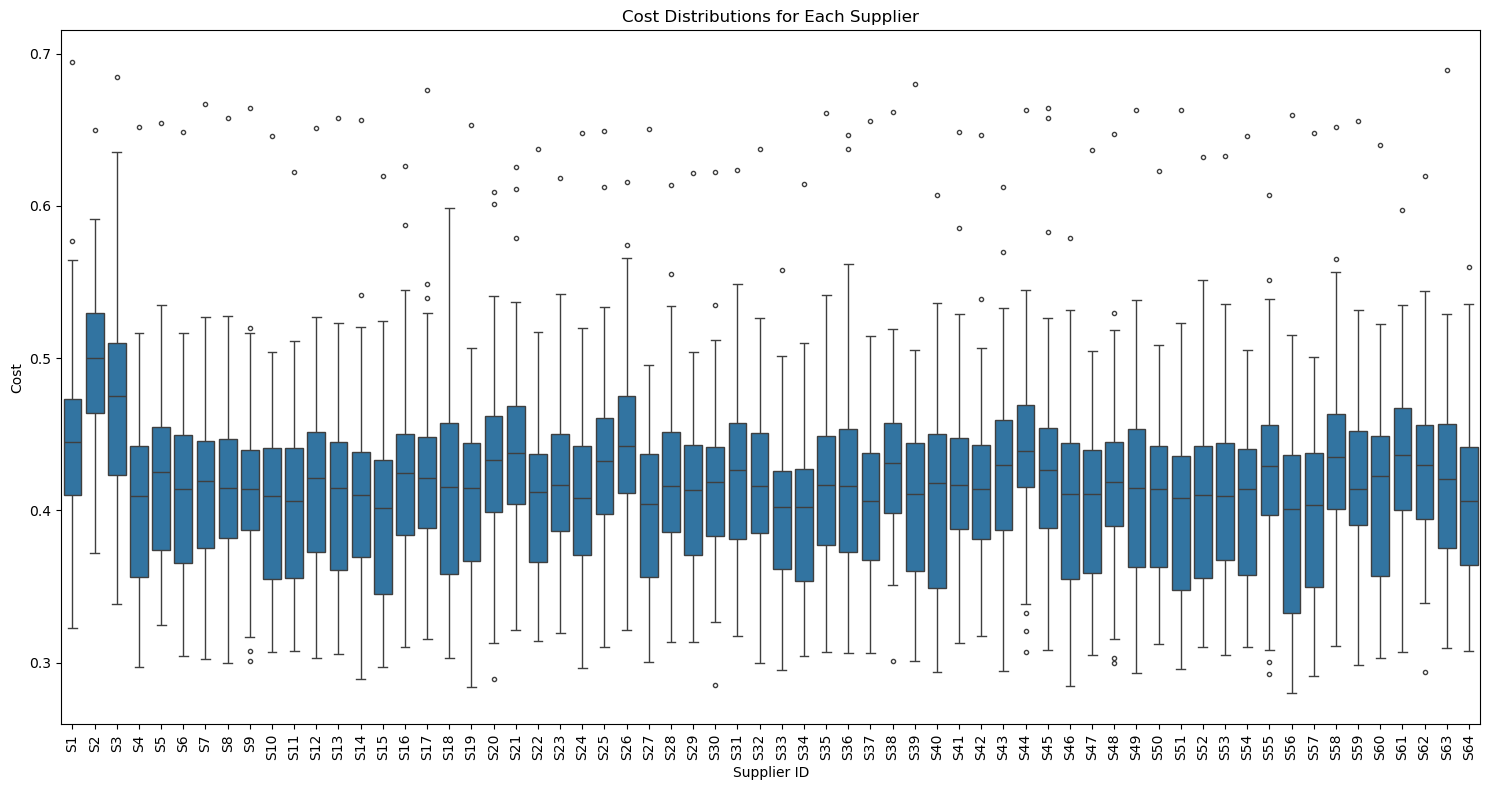

In [205]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Supplier ID', y='Cost', data=cost, flierprops=dict(marker='o', markersize=3))
plt.title("Cost Distributions for Each Supplier")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

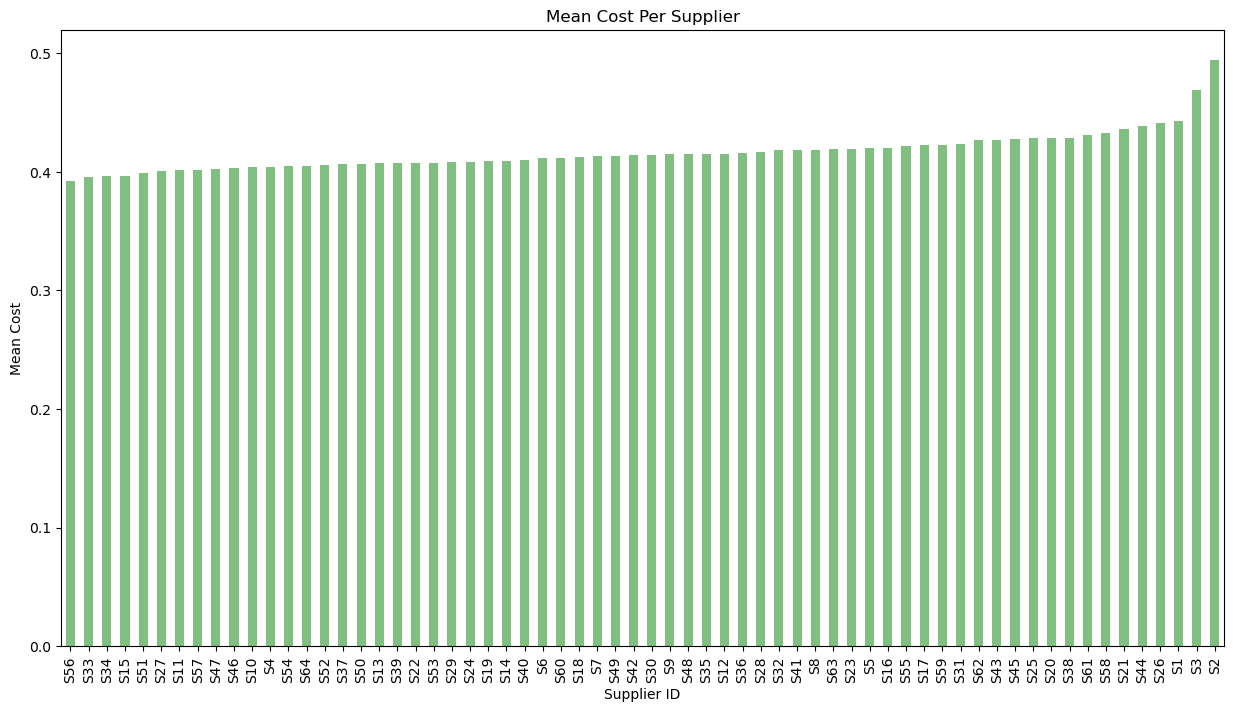

In [207]:
Supplier_Mean_Costs = cost.groupby('Supplier ID')['Cost'].mean().sort_values()
Supplier_Mean_Costs.plot(kind='bar', figsize=(15, 8), color='green', alpha=0.5)
plt.title("Mean Cost Per Supplier")
plt.xlabel("Supplier ID")
plt.ylabel("Mean Cost")
plt.show()
#S56 is best

In [ ]:
#Q2.3 Explore how errors (Eq. 1) are distributed across different choices of suppliers, identifying key trends or outliers in their performance. Calculate the RMSE (Eq .2) of each supplier for all tasks.

In [209]:
# Compute the optimal cost for each task
optimal_costs = cost.groupby('Task ID')['Cost'].min()
print(optimal_costs.head()) #gives a dataframe of the minimum cost for each task
# Calculate errors
cost['Error'] = cost['Cost']-cost['Task ID'].map(optimal_costs)

Task ID
T1      0.355652
T10     0.317026
T100    0.411130
T101    0.408853
T102    0.389170
Name: Cost, dtype: float64


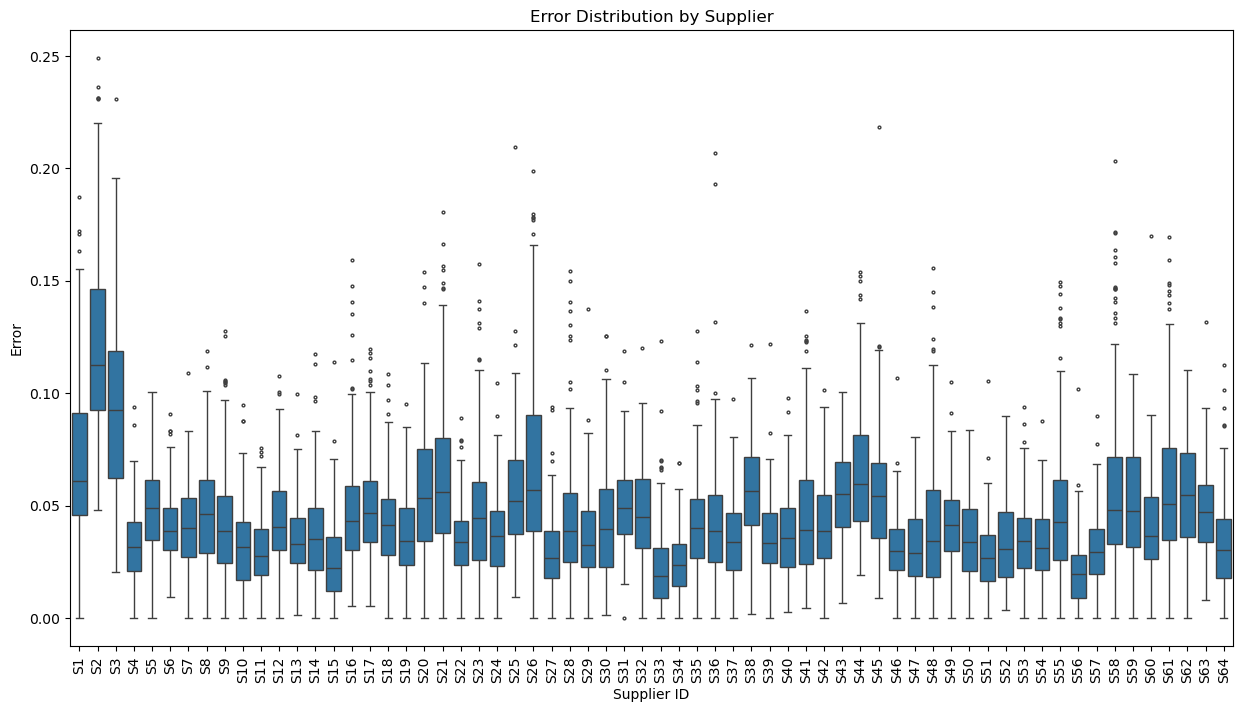

In [213]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Supplier ID', y='Error', data=cost, flierprops=dict(marker='o', markersize=2))
plt.xticks(rotation=90)
plt.title("Error Distribution by Supplier")
plt.show() 

In [215]:
cost['Squared Error'] = cost['Error'] ** 2
RMSE_values = cost.groupby('Supplier ID').apply(
    lambda df: np.sqrt(df['Squared Error'].mean())
).rename('RMSE')
print(RMSE_values)

Supplier ID
S1     0.081803
S10    0.037460
S11    0.033735
S12    0.048724
S13    0.039545
         ...   
S63    0.050874
S64    0.040125
S7     0.045649
S8     0.053460
S9     0.051150
Name: RMSE, Length: 64, dtype: float64


C:\Users\bdaus\AppData\Local\Temp\ipykernel_424\1055905698.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  RMSE_values = cost.groupby('Supplier ID').apply(


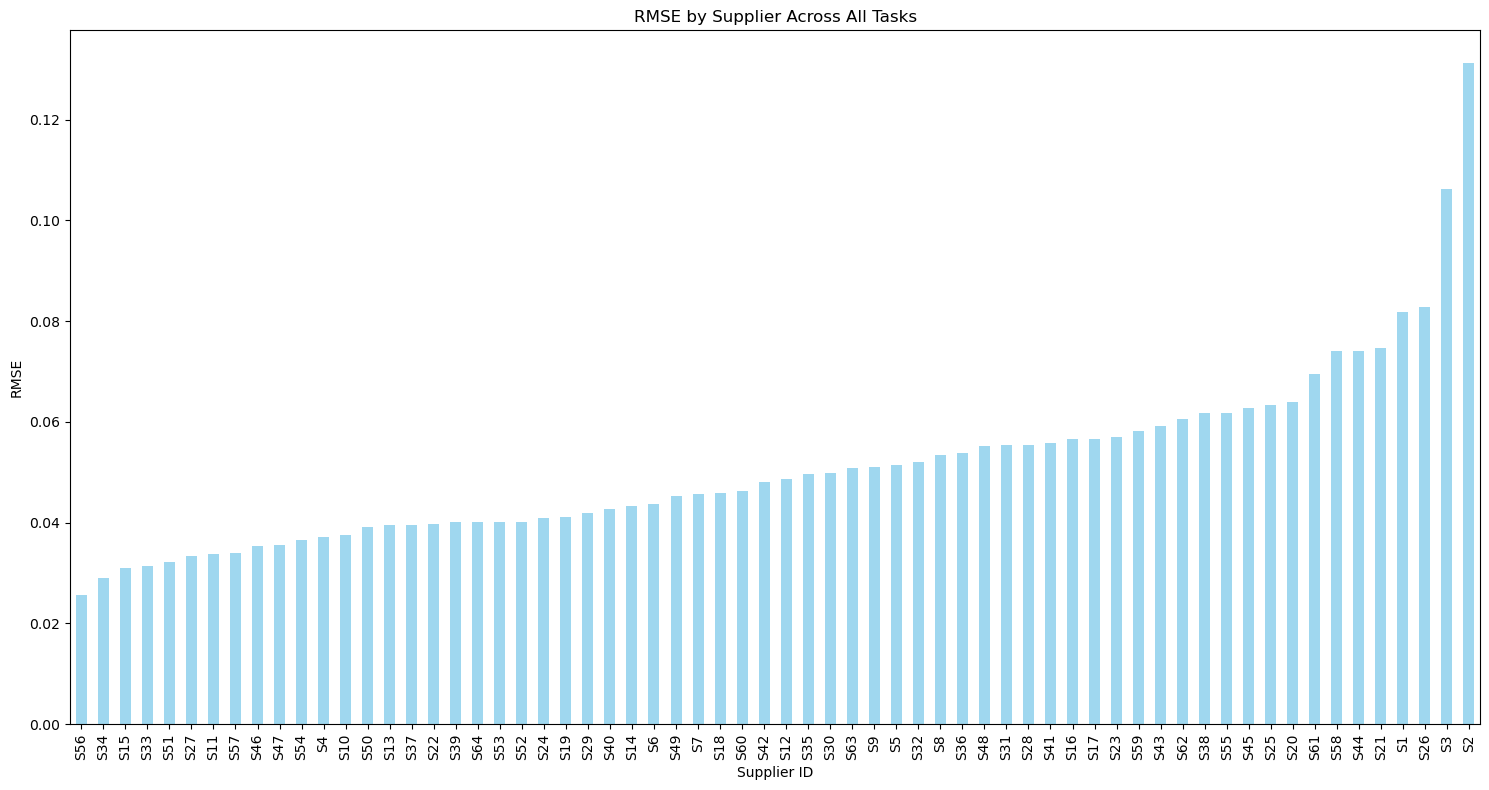

In [217]:
plt.figure(figsize=(15, 8))
RMSE_values.sort_values().plot(kind='bar', color='skyblue', alpha=0.8)
plt.title("RMSE by Supplier Across All Tasks")
plt.xlabel("Supplier ID")
plt.ylabel("RMSE")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()